___
<h1 style="color:blue;">MULTIPLE LINEAR REGRESSION</h1>

___

## Introduction to Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of simple linear regression that allows for the inclusion of multiple independent variables to predict the value of a dependent variable. This statistical technique helps in understanding the relationship between two or more predictor variables and a response variable by fitting a linear equation to the observed data.

## Key Concepts

1. **Dependent Variable (Y)**: The variable we are trying to predict or explain.
2. **Independent Variables (X1, X2, ..., Xn)**: The variables that are used to predict the dependent variable.
3. **Linear Relationship**: The relationship between the dependent and independent variables is assumed to be linear.
4. **Regression Coefficients**: These coefficients represent the change in the dependent variable for a one-unit change in the independent variable.

## The Multiple Linear Regression Equation

The equation for multiple linear regression is:
\[ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon \]

- \( Y \): Dependent variable
- \( \beta_0 \): Intercept
- \( \beta_1, \beta_2, ..., \beta_n \): Regression coefficients
- \( X_1, X_2, ..., X_n \): Independent variables
- \( \epsilon \): Error term (the difference between the observed and predicted values)

## Assumptions of Multiple Linear Regression

1. **Linearity**: The relationship between the dependent and independent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: Constant variance of the error terms.
4. **Normality**: The error terms are normally distributed.
5. **No Multicollinearity**: Independent variables are not highly correlated with each other.

## Applications

Multiple Linear Regression is widely used in various fields such as:

- **Economics**: To predict economic indicators like GDP, inflation rates, etc.
- **Finance**: To predict stock prices, credit scoring, etc.
- **Marketing**: To analyze the effectiveness of marketing campaigns.
- **Medicine**: To predict health outcomes based on various predictors like age, weight, and other health indicators.

## Data: Student Performance Dataset

### Description
The Student Performance Dataset is designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variables

- **Hours Studied**: The total number of hours spent studying by each student.
- **Previous Scores**: The scores obtained by students in previous tests.
- **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours**: The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced**: The number of sample question papers the student practiced.

### Target Variable

- **Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

[Link to the data](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)



___
## <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge

# importing the dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
# Checking for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [3]:
# data insights
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
# converting the columns names to without spaces
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
# Convert the percentage_index to integer
df['Performance_Index'] = df['Performance_Index'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours_Studied                     10000 non-null  int64 
 1   Previous_Scores                   10000 non-null  int64 
 2   Extracurricular_Activities        10000 non-null  object
 3   Sleep_Hours                       10000 non-null  int64 
 4   Sample_Question_Papers_Practiced  10000 non-null  int64 
 5   Performance_Index                 10000 non-null  int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 429.8+ KB


In [7]:
# Converting the categorical variables to numerical
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# Converting the categorical variables to numerical
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours_Studied                     10000 non-null  int64
 1   Previous_Scores                   10000 non-null  int64
 2   Extracurricular_Activities        10000 non-null  int32
 3   Sleep_Hours                       10000 non-null  int64
 4   Sample_Question_Papers_Practiced  10000 non-null  int64
 5   Performance_Index                 10000 non-null  int32
dtypes: int32(2), int64(4)
memory usage: 390.8 KB


> As data is already cleaned, we will directly move to the Exploratory Data Analysis part.

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

In [8]:
# Finiding the unique values in the dataset
df.nunique()

Hours_Studied                        9
Previous_Scores                     60
Extracurricular_Activities           2
Sleep_Hours                          6
Sample_Question_Papers_Practiced    10
Performance_Index                   91
dtype: int64

>  Making Histograms of the data to understand the distribution of the data.

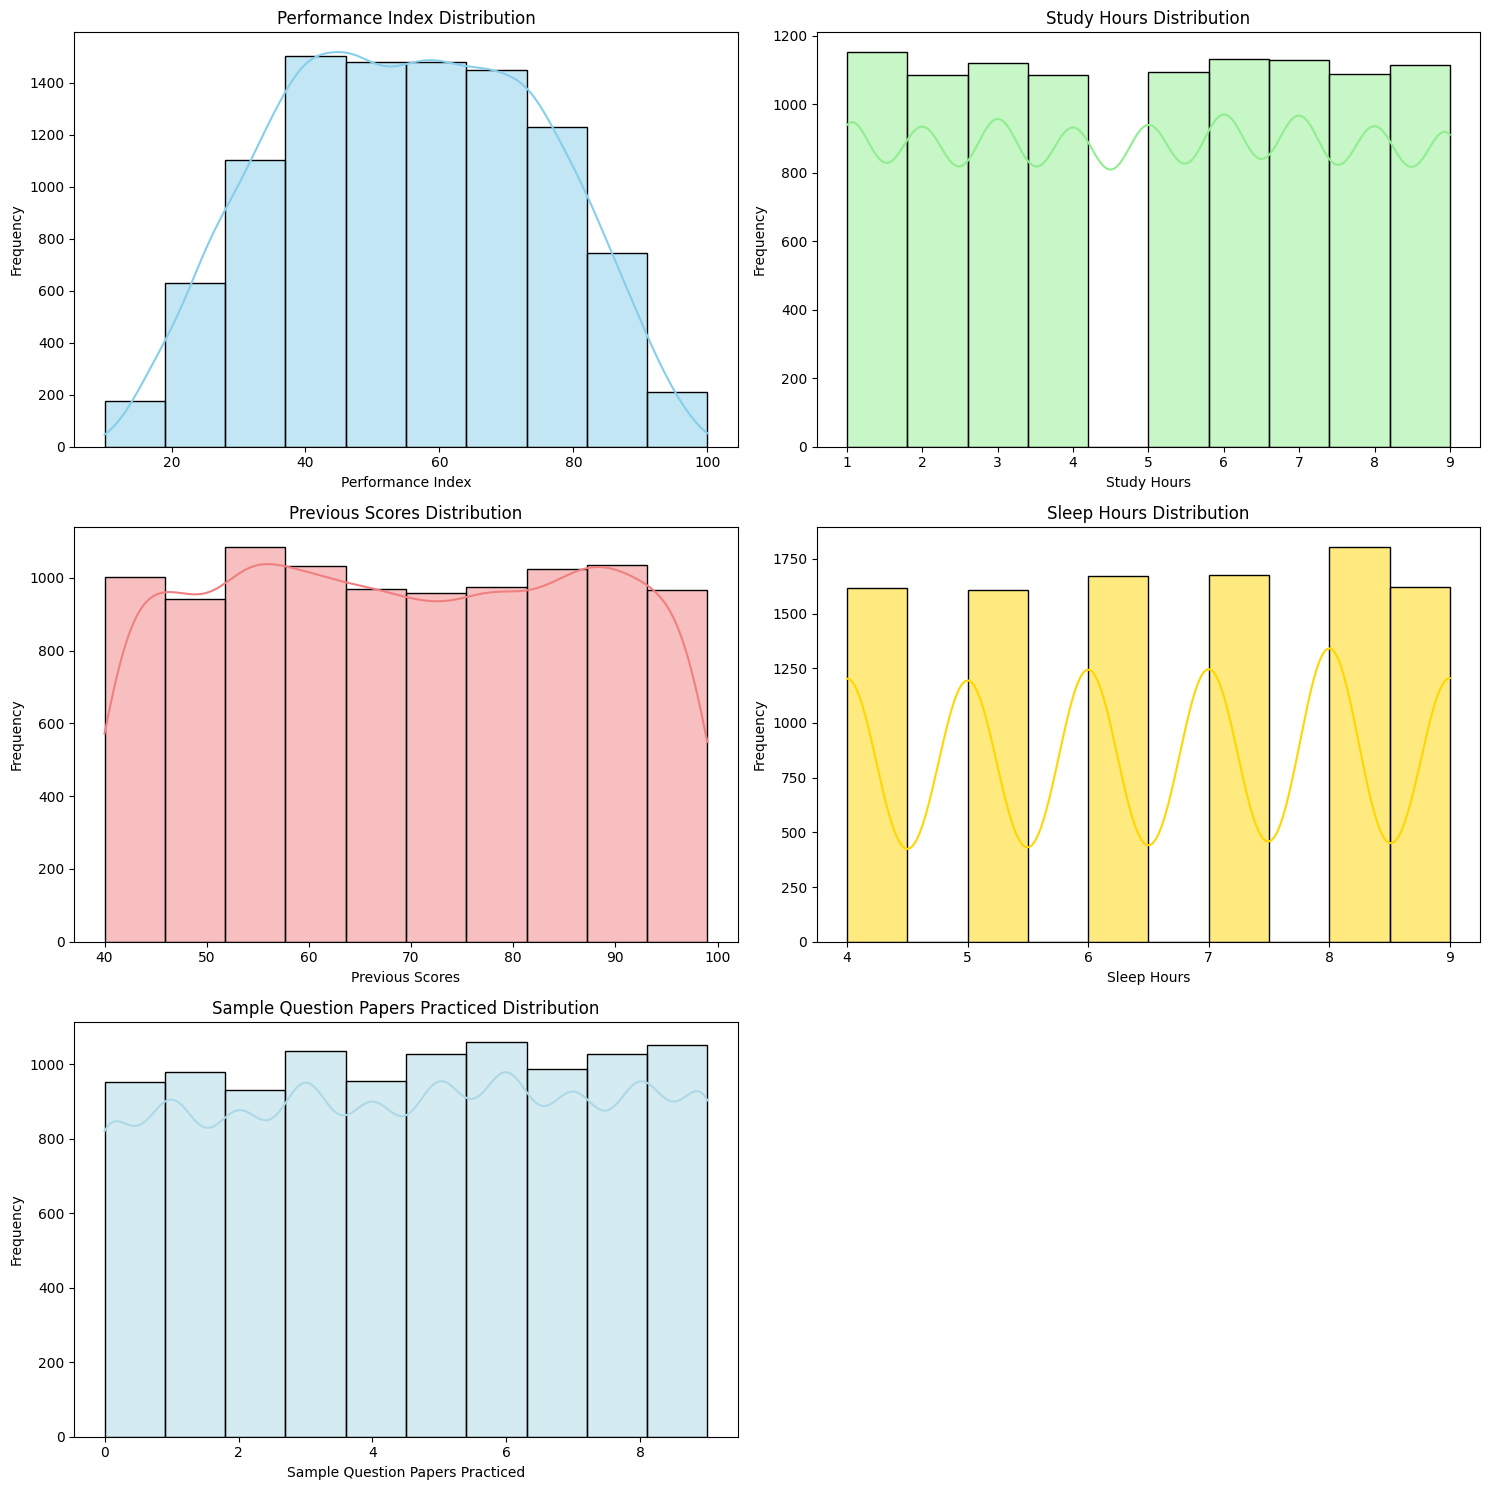

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Making the histogram of Performance Index
sns.histplot(df['Performance_Index'], kde=True, color='skyblue', bins=10, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Performance Index Distribution')
axes[0, 0].set_xlabel('Performance Index')
axes[0, 0].set_ylabel('Frequency')

# Making the histogram of Hours_Studied
sns.histplot(df['Hours_Studied'], kde=True, color='lightgreen', bins=10, edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Study Hours Distribution')
axes[0, 1].set_xlabel('Study Hours')
axes[0, 1].set_ylabel('Frequency')

# Making the histogram of Previous_Score
sns.histplot(df['Previous_Scores'], kde=True, color='lightcoral', bins=10, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Previous Scores Distribution')
axes[1, 0].set_xlabel('Previous Scores')
axes[1, 0].set_ylabel('Frequency')

# Making the histogram of Sleep Hours
sns.histplot(df['Sleep_Hours'], kde=True, color='gold', bins=10, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Sleep Hours Distribution')
axes[1, 1].set_xlabel('Sleep Hours')
axes[1, 1].set_ylabel('Frequency')

# Making the histogram of Sample_Question_Papers_Practiced
sns.histplot(df['Sample_Question_Papers_Practiced'], kde=True, color='lightblue', bins=10, edgecolor='black', ax=axes[2, 0])
axes[2, 0].set_title('Sample Question Papers Practiced Distribution')
axes[2, 0].set_xlabel('Sample Question Papers Practiced')
axes[2, 0].set_ylabel('Frequency')

# Hide the unused subplot (bottom right corner)
fig.delaxes(axes[2, 1])

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


> Making box plots to understand the spread of the data.

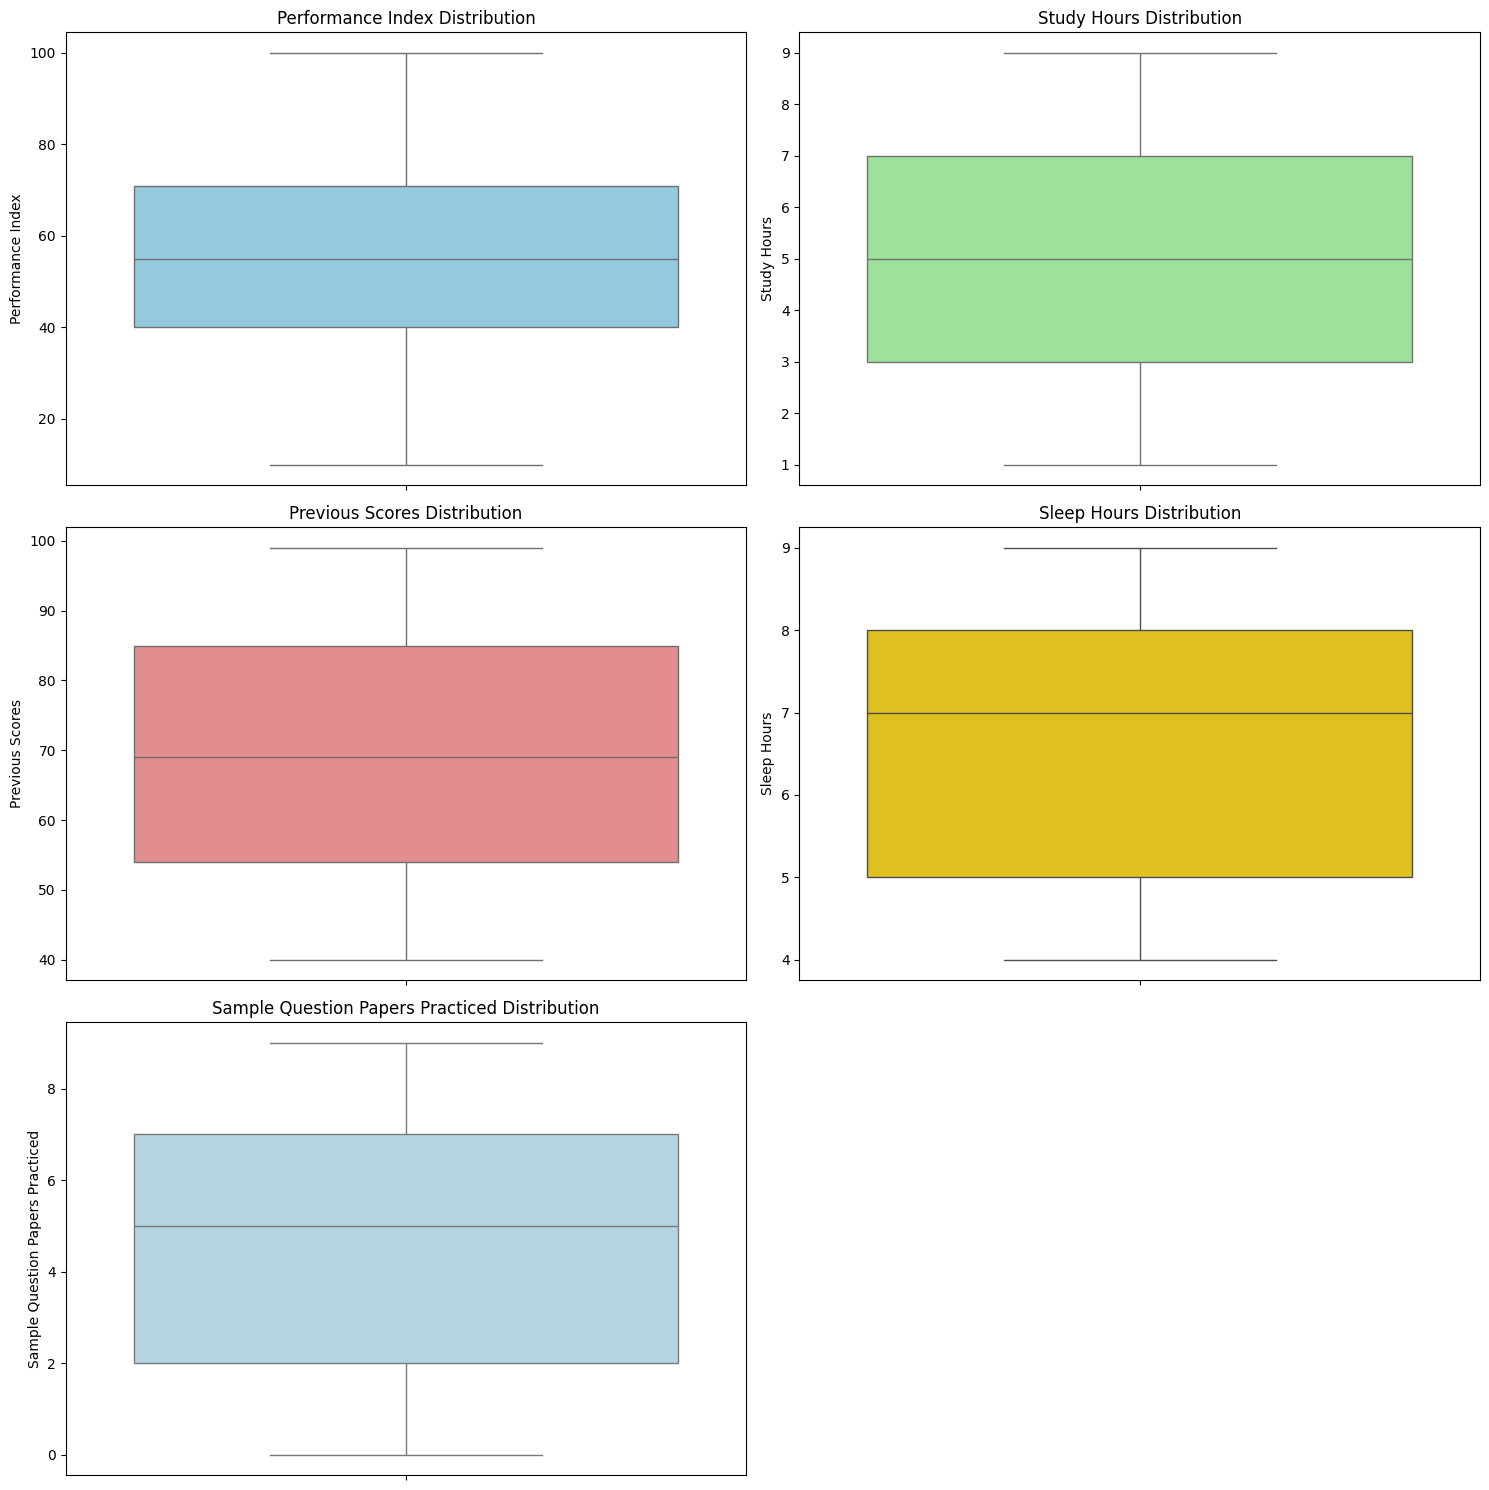

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Making the boxplot of Performance Index
sns.boxplot(data=df, y='Performance_Index', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Performance Index Distribution')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Performance Index')

# Making the boxplot of Hours_Studied
sns.boxplot(data=df, y='Hours_Studied', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Study Hours Distribution')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Study Hours')

# Making the boxplot of Previous Scores
sns.boxplot(data=df, y='Previous_Scores', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Previous Scores Distribution')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Previous Scores')

# Making the boxplot of Sleep Hours
sns.boxplot(data=df, y='Sleep_Hours', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Sleep Hours Distribution')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Sleep Hours')

# Making the boxplot of Sample Question Papers Practiced
sns.boxplot(data=df, y='Sample_Question_Papers_Practiced', ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('Sample Question Papers Practiced Distribution')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Sample Question Papers Practiced')

# Hide the unused subplot (bottom right corner)
fig.delaxes(axes[2, 1])

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


___
## <span style="color:blue;">Model Development</span>
___


## Multiple Linear Regression
- **Objective:** Predict the response variable based on the predictor variables.
- **Techniques:** Fitting a multiple linear equation to the observed data points.
- **Usage:** Used to understand the relationship between multiple continuous variables and make predictions.

In [11]:
#splitting the dataset into dependent and independent variables
X = df.drop('Performance_Index', axis=1)
y = df['Performance_Index']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
# Fitting the Linear Regression model to the dataset
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Calculating the Coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Calculating the Intercept
intercept = regressor.intercept_
intercept


-34.07520822521337

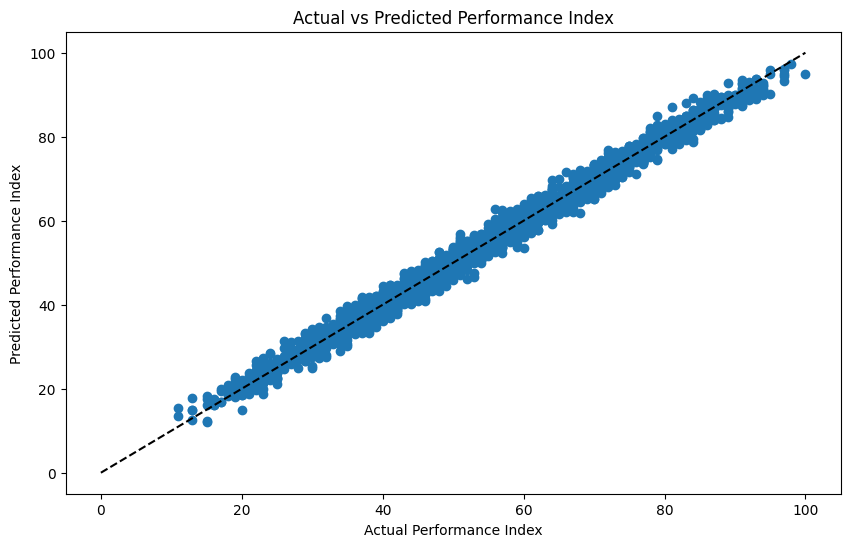

In [13]:
# plotting the regression line
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 100], [0, 100], '--k')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>
___

## Model Performance Metrics
- **Objective:** Evaluate the performance of the model.
- **Techniques:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²) score.
- **Usage:** Helps in understanding how well the model is performing and making comparisons between models.

### Explanation of Metrics and Analysis

1. **R-squared (R²)**
   - **Information Provided:** Proportion of variance in the dependent variable that is predictable from the independent variable(s). It indicates how well the model explains the variability of the outcome.
   - **Interpretation:** Higher values indicate a better fit.

2. **Mean Squared Error (MSE)**
   - **Information Provided:** Average of the squared differences between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

3. **Mean Absolute Error (MAE)**
   - **Information Provided:** Average of absolute errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

4. **Mean Absolute Percentage Error (MAPE)**
   - **Information Provided:** Average of absolute percentage errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

5. **Residual Analysis**
   - **Information Provided:** Plot of residuals (differences between predicted and actual values) to assess if residuals are randomly distributed.
   - **Interpretation:** Randomly scattered residuals suggest a good fit; patterns indicate potential issues.

6. **Learning Curves**
   - **Information Provided:** Shows training and validation errors as a function of the number of training samples.
   - **Interpretation:** Helps diagnose if the model is overfitting or underfitting.

7. **Validation Curves**
   - **Information Provided:** Shows training and validation errors as a function of a hyperparameter (e.g., whether to fit intercept).
   - **Interpretation:** Helps determine the optimal value for the hyperparameter.

In [14]:
# Evaluating the model using the metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


R2 Score: 0.9880686410711422
Mean Absolute Error: 1.622970832971088
Mean Squared Error: 4.105609215835832
Root Mean Squared Error: 2.026230296840868


> ### `Correlation Analysis`
> - **Objective:** Examine the strength and direction of the relationship between two or more continuous variables.
> - **Techniques:** Pearson correlation coefficient, scatter plots.
> - **Usage:** Helps in understanding the linear relationship between variables and identifying potential predictors.

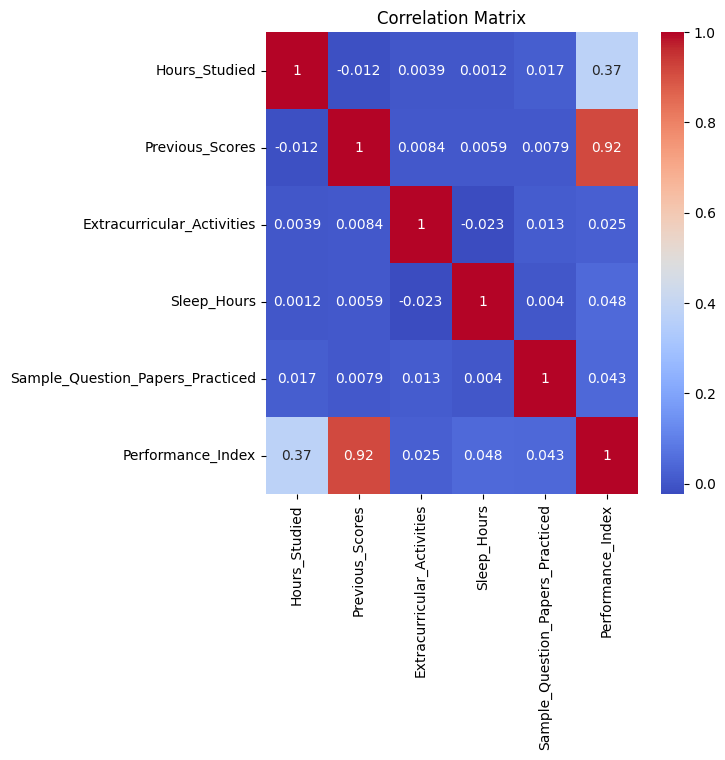

In [15]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

>  ### `Residual Analysis`
> - **Objective:** Evaluate the model's assumptions and check for patterns in the residuals.
> - **Techniques:** Residual plots, QQ plots, homoscedasticity tests.
> - **Usage:** Helps in assessing the model's performance and identifying potential issues.

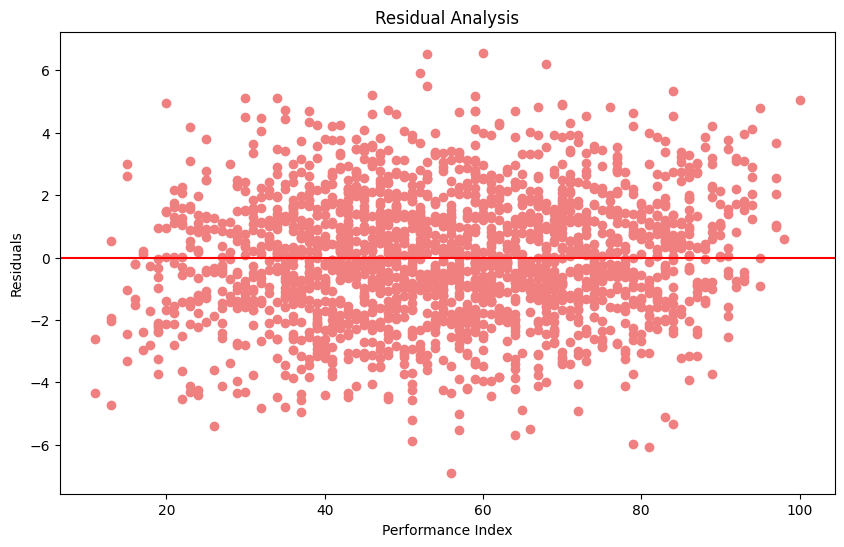

In [16]:
# Residual Analysis
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='lightcoral')
plt.title('Residual Analysis')
plt.xlabel('Performance Index')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

> `Learning Curves`
A learning curve is a plot that shows how the performance of a machine learning model improves as it learns from more data. It typically plots the training and cross-validation scores against varying numbers of training examples. Learning curves are useful for diagnosing whether a model has a bias or variance problem:

- Bias: If both training and cross-validation scores plateau at a low value, the model may be too simple (underfitting).
- Variance: If there is a significant gap between training and cross-validation scores, the model may be too complex (overfitting).
The `learning_curve` function helps visualize these trends, aiding in the assessment of model performance and determining if more data would be beneficial.

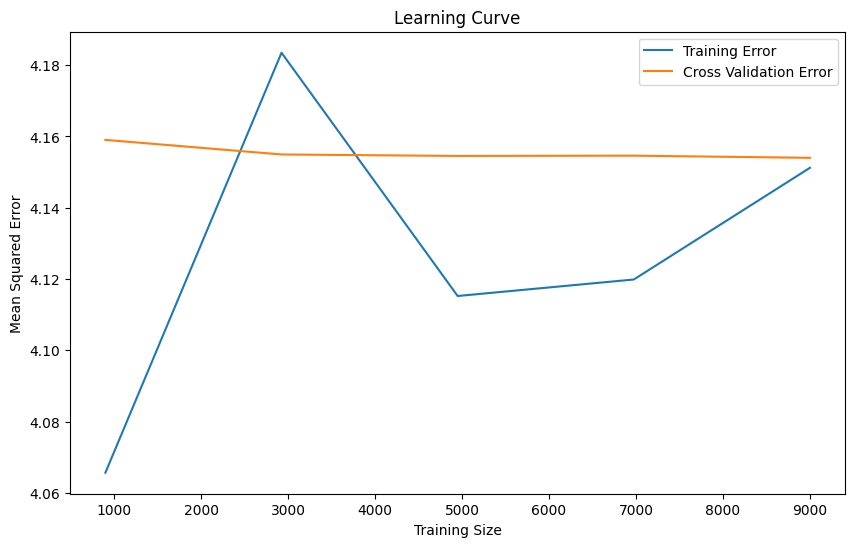

In [17]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plotting the Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Cross Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Explanation:

1. **Generating the Learning Curve Data**
   - `train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=10, scoring='neg_mean_squared_error')`:
     - `learning_curve(...)`: Computes the learning curve.
     - `regressor`: The machine learning estimator (regressor) being used to fit the data.
     - `X`: Features dataset.
     - `y`: Target variable.
     - `cv=10`: Specifies 10-fold cross-validation.
     - `scoring='neg_mean_squared_error'`: Uses negative mean squared error as the scoring metric (note that scikit-learn returns negative values for errors by default).

2. **Calculating Mean Training and Test Scores**
   - `train_scores_mean = -train_scores.mean(axis=1)`:
     - `train_scores.mean(axis=1)`: Computes the mean of the training scores for each training size across the cross-validation folds.
     - `-train_scores_mean`: Negates the mean training scores to convert the negative mean squared errors to positive values.
   - `test_scores_mean = -test_scores.mean(axis=1)`:
     - `test_scores.mean(axis=1)`: Computes the mean of the test (validation) scores for each training size across the cross-validation folds.
     - `-test_scores_mean`: Negates the mean test scores to convert the negative mean squared errors to positive values.


___
## <span style="color:blue;">Sample Testing</span>

___


In [18]:
# Testing the model with a new data
new_data = [[4, 99, 6, 1, 1]] # [Hours_Studied, Previous_Scores, Sleep_Hours, Extracurricular_Activities, Sample_Question_Papers_Practiced]
new_pred = regressor.predict(new_data) 
new_pred # Predicted Performance Index

c:\Users\Ahmad\anaconda3\envs\NLP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82.85666682])

___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings

- **Relationship Between Predictors and Performance**: The analysis confirms significant relationships between several predictors (hours studied, previous scores, extracurricular activities, sleep hours, and sample question papers practiced) and the performance index of students. The model indicates how each factor contributes to academic performance.
  
- **Model Performance**: The Multiple Linear Regression model performed exceptionally well, achieving a high R-squared score of approximately 0.988. This indicates that 98.8% of the variance in the performance index can be explained by the predictor variables.

- **Model Evaluation**: Evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) were calculated to be low, specifically MSE = 4.106, MAE = 1.623, and RMSE = 2.026. These low values suggest that the model predicts the performance index with high accuracy.

### Insights

- **Data Distribution**: The dataset exhibited a normal distribution for key variables, with histograms and box plots confirming the spread and central tendency. No significant outliers were detected that would impact model reliability.
  
- **Model Robustness**: Cross-validation, learning curve, and residual analyses consistently demonstrated the model's robust performance, indicating its reliability in predicting performance indices based on the given predictors across different subsets of data.

### Recommendations

- **Feature Engineering**: Further exploration into additional features such as teaching quality, parental involvement, or socio-economic factors could potentially enhance the model's predictive power.
  
- **Advanced Techniques**: Consider applying more sophisticated regression techniques or ensemble methods to further optimize model accuracy and generalize its applicability.
  
- **Deployment**: Prepare the model for deployment in practical scenarios, ensuring scalability and adaptation to new data inputs effectively.

### Final Thoughts

- The findings underscore the practical relevance of Multiple Linear Regression in predicting academic performance outcomes based on various predictors, offering valuable insights for educators, policymakers, and academic researchers.
  
- Continued exploration and collaboration in refining the model could yield enhanced predictive capabilities and broader application in related fields.

## Acknowledgements

- **Data Source**: Kaggle Dataset: [Synthetic Student Performance Data](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
  
- **Libraries**: Utilized numpy, pandas, matplotlib, seaborn, and scikit-learn for data analysis, visualization, and modeling.

## Contact Information

- For further inquiries or collaborations, please contact [ahmadbinsadiq@gmail.com](mailto:ahmadbinsadiq@gmail.com).

## References

- Kaggle Dataset: [Synthetic Student Performance Data](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
